In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



data = pd.read_csv("GenreData.csv")
df = pd.DataFrame(data)

X = data.drop(['title','artist','year','top genre'], axis = 1)
y = data['top genre']

#one-hot encoding
y_dum = pd.get_dummies(y)
scaler = MinMaxScaler()
normalized_class = scaler.fit_transform(y_dum) 				# returns an array
y_onehot = pd.DataFrame(normalized_class, columns = y_dum.columns)	# convert array to DataFrame
print("Pre-processed class :")
print(y_onehot)

#Normalize each fields of input
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(data = X_rescaled, columns = X.columns)
print(X_rescaled)

# Combine the normalized input features and the target variable
data1 = pd.concat([X_rescaled, y], axis=1)			#data without onehot-encoding class
data = pd.concat([X_rescaled, y_onehot], axis=1)	#data with onehot-encoding class

Pre-processed class :
     acoustic blues  adult standards  afrobeat  afropop  album rock  \
0               0.0              1.0       0.0      0.0         0.0   
1               0.0              0.0       0.0      0.0         0.0   
2               0.0              1.0       0.0      0.0         0.0   
3               0.0              1.0       0.0      0.0         0.0   
4               0.0              0.0       0.0      0.0         0.0   
..              ...              ...       ...      ...         ...   
561             0.0              0.0       0.0      0.0         0.0   
562             0.0              0.0       0.0      0.0         0.0   
563             0.0              0.0       0.0      0.0         0.0   
564             0.0              0.0       0.0      0.0         0.0   
565             0.0              0.0       0.0      0.0         0.0   

     alternative metal  alternative rock  american folk revival  art pop  \
0                  0.0               0.0         

/Users/niharikamisal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


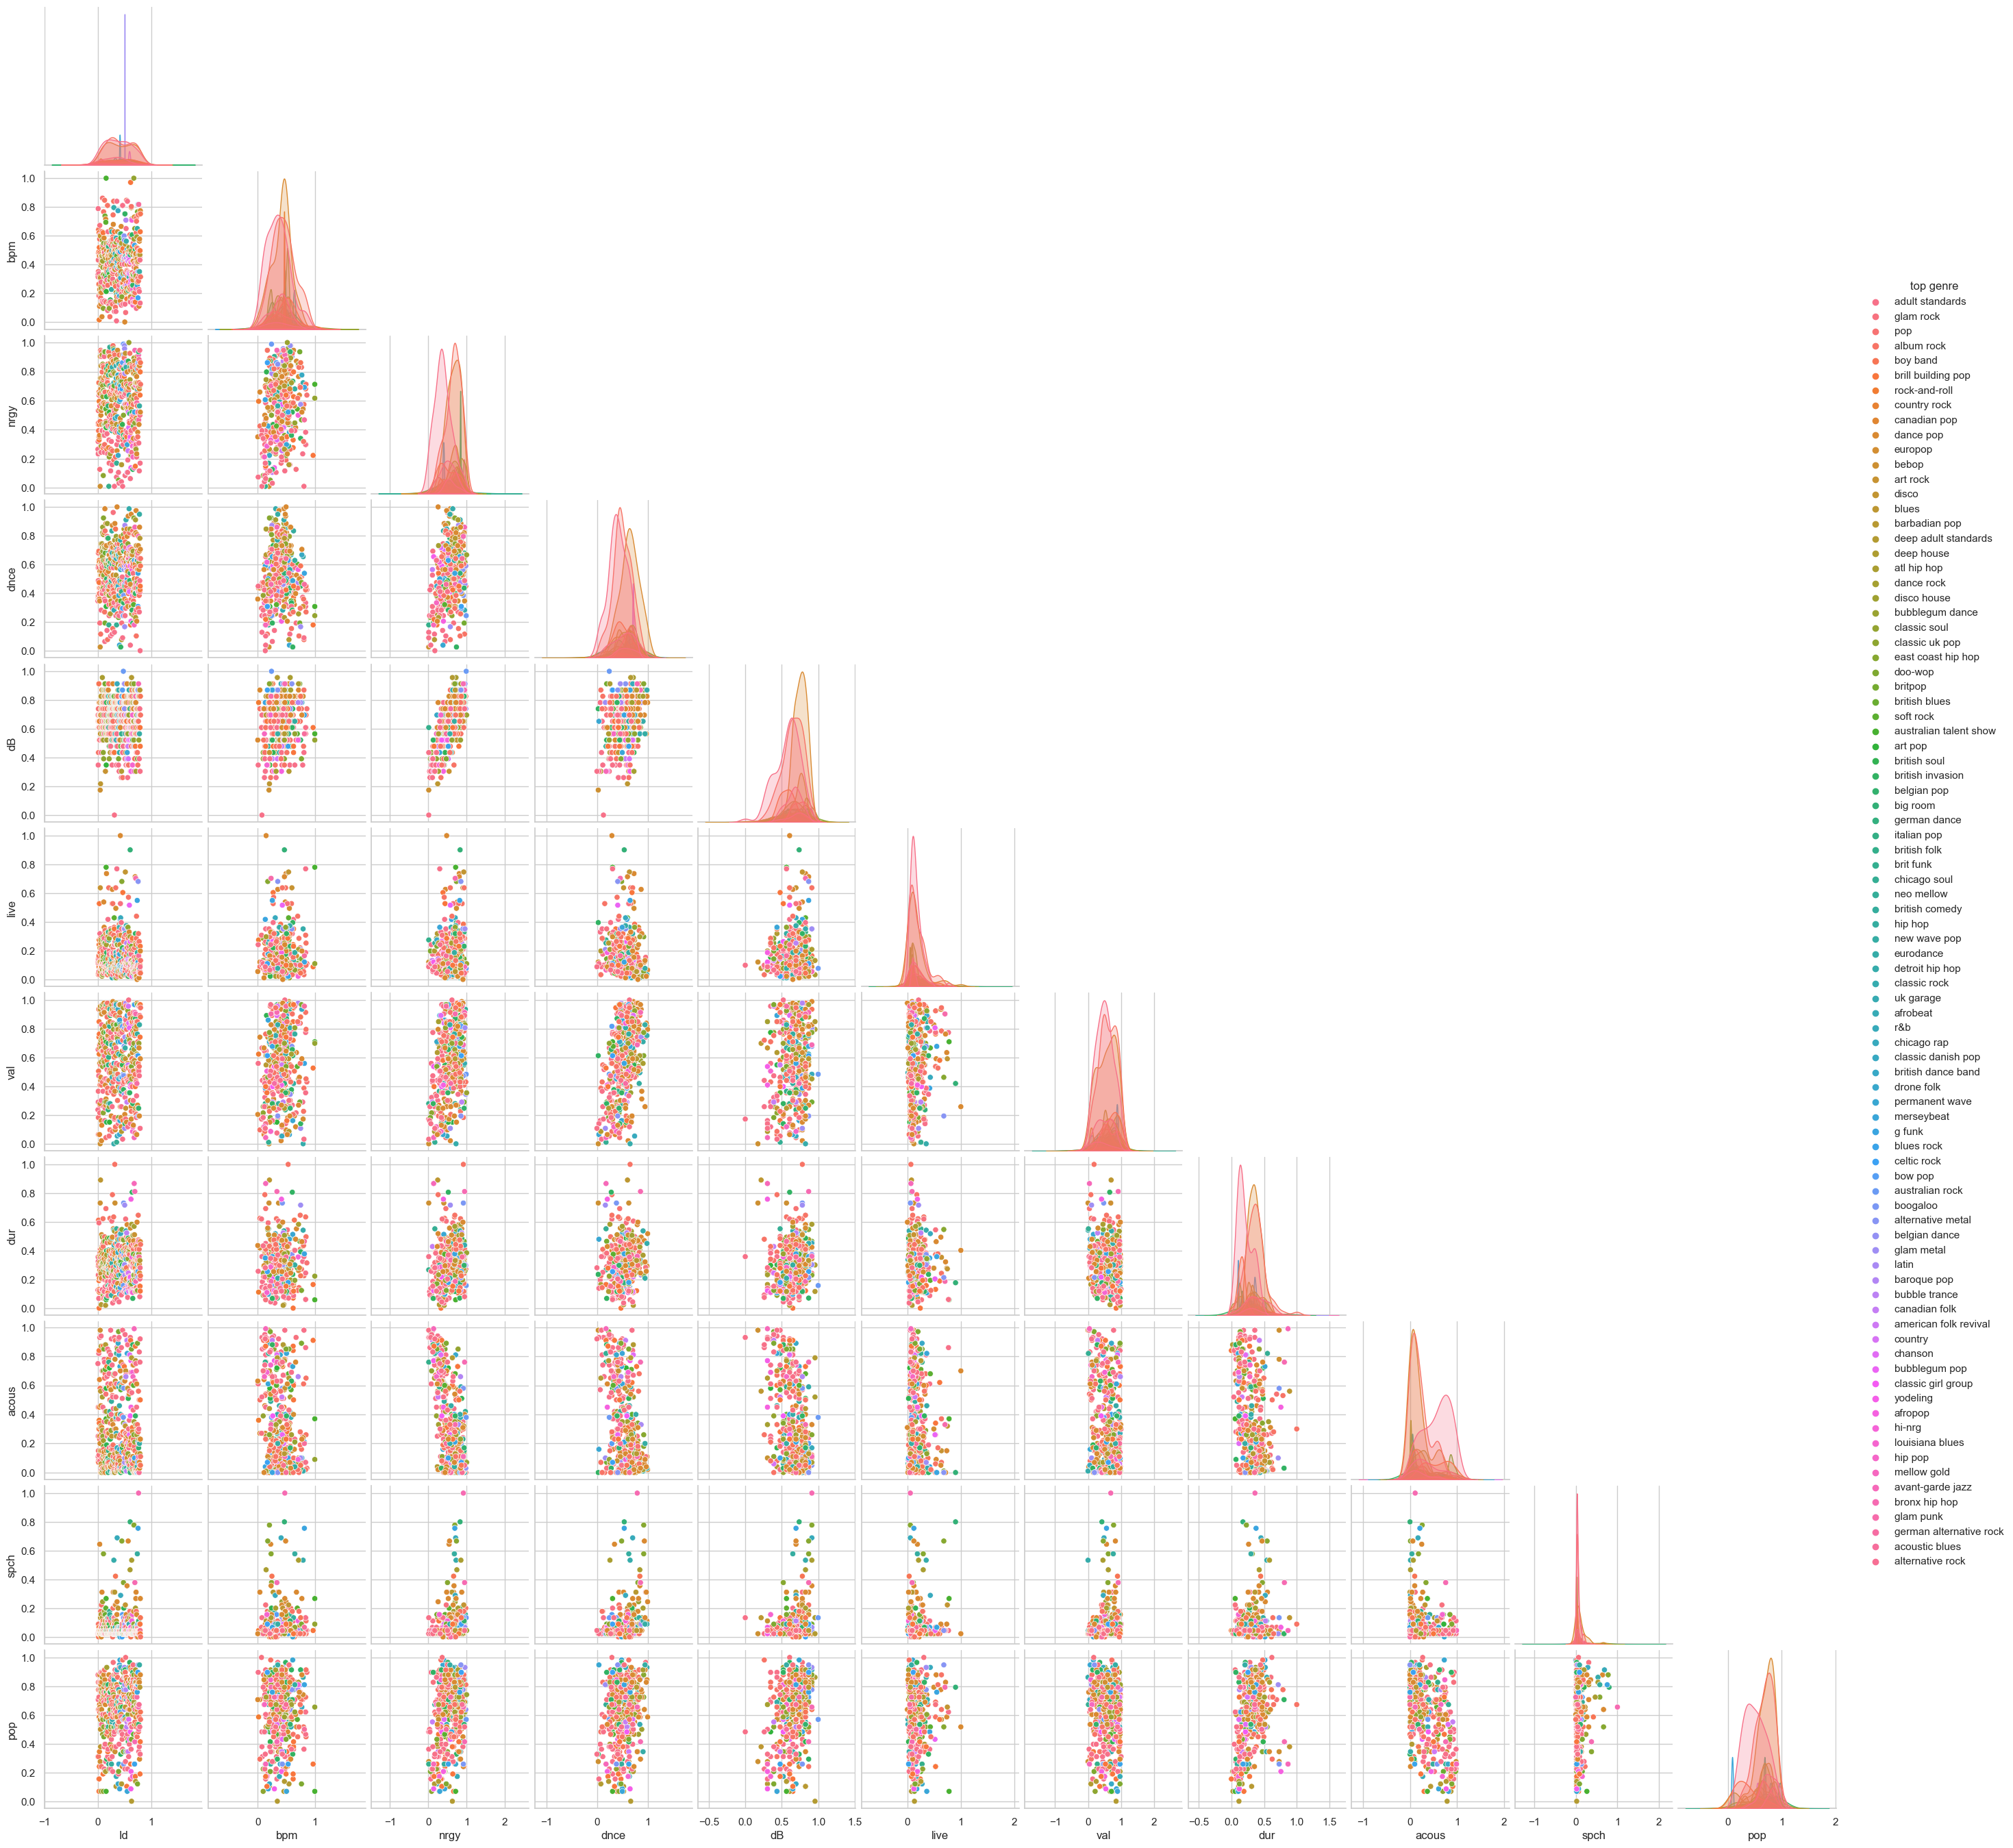

In [4]:
# Create a pair plot
sns.set(style="whitegrid")
g = sns.pairplot(data=data1, hue="top genre", corner=True, palette='husl')

plt.show()

In [3]:
#Investigating possible null values

nullVals = df[df.isnull().any(axis=1)]
nullVals

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,NaN
26,27,Drinks On The House,Green Martini Keys,2016,97,16,57,-16,11,15,181,100,5,28,NaN
72,73,Pachuko Hop,Ike Carpenter Orchestra,2006,83,53,48,-9,34,80,135,59,3,28,NaN
90,91,Little Things Means A Lot,Jayne Mansfield,2008,109,29,70,-15,16,63,172,36,4,29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78,NaN
562,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44,NaN
563,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74,NaN
564,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71,NaN


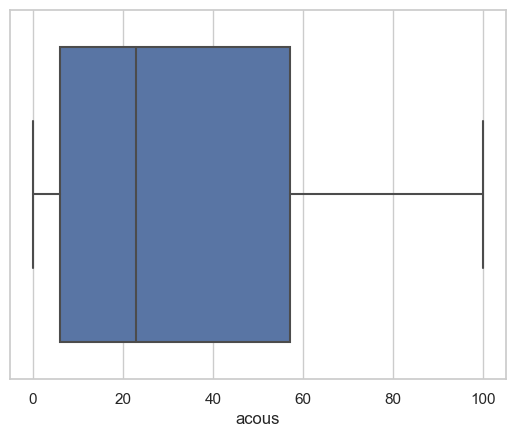

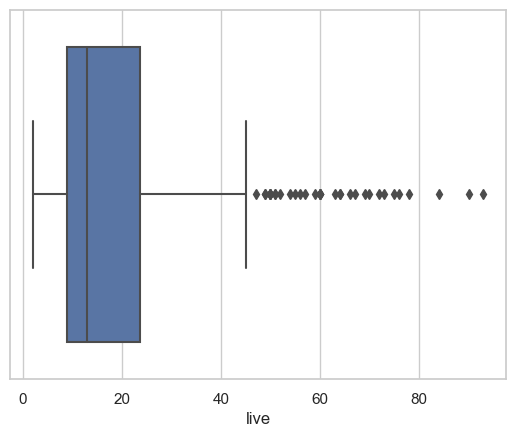

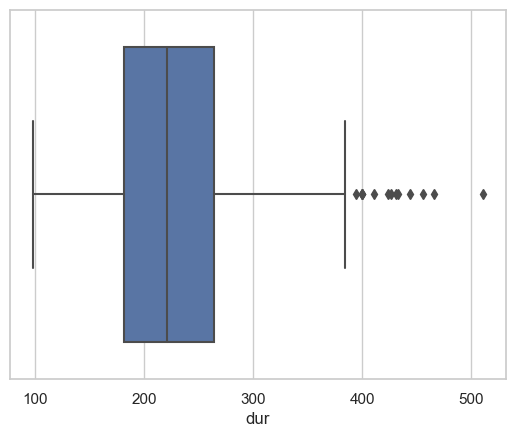

In [7]:
#Investigating possible outliers for various attributes

import seaborn as sns
sns.boxplot(x=df['acous']) # no visible outliers
plt.show()
sns.boxplot(x=df['live']) # many outliers
plt.show()
sns.boxplot(x=df['dur']) # less outliers
plt.show()

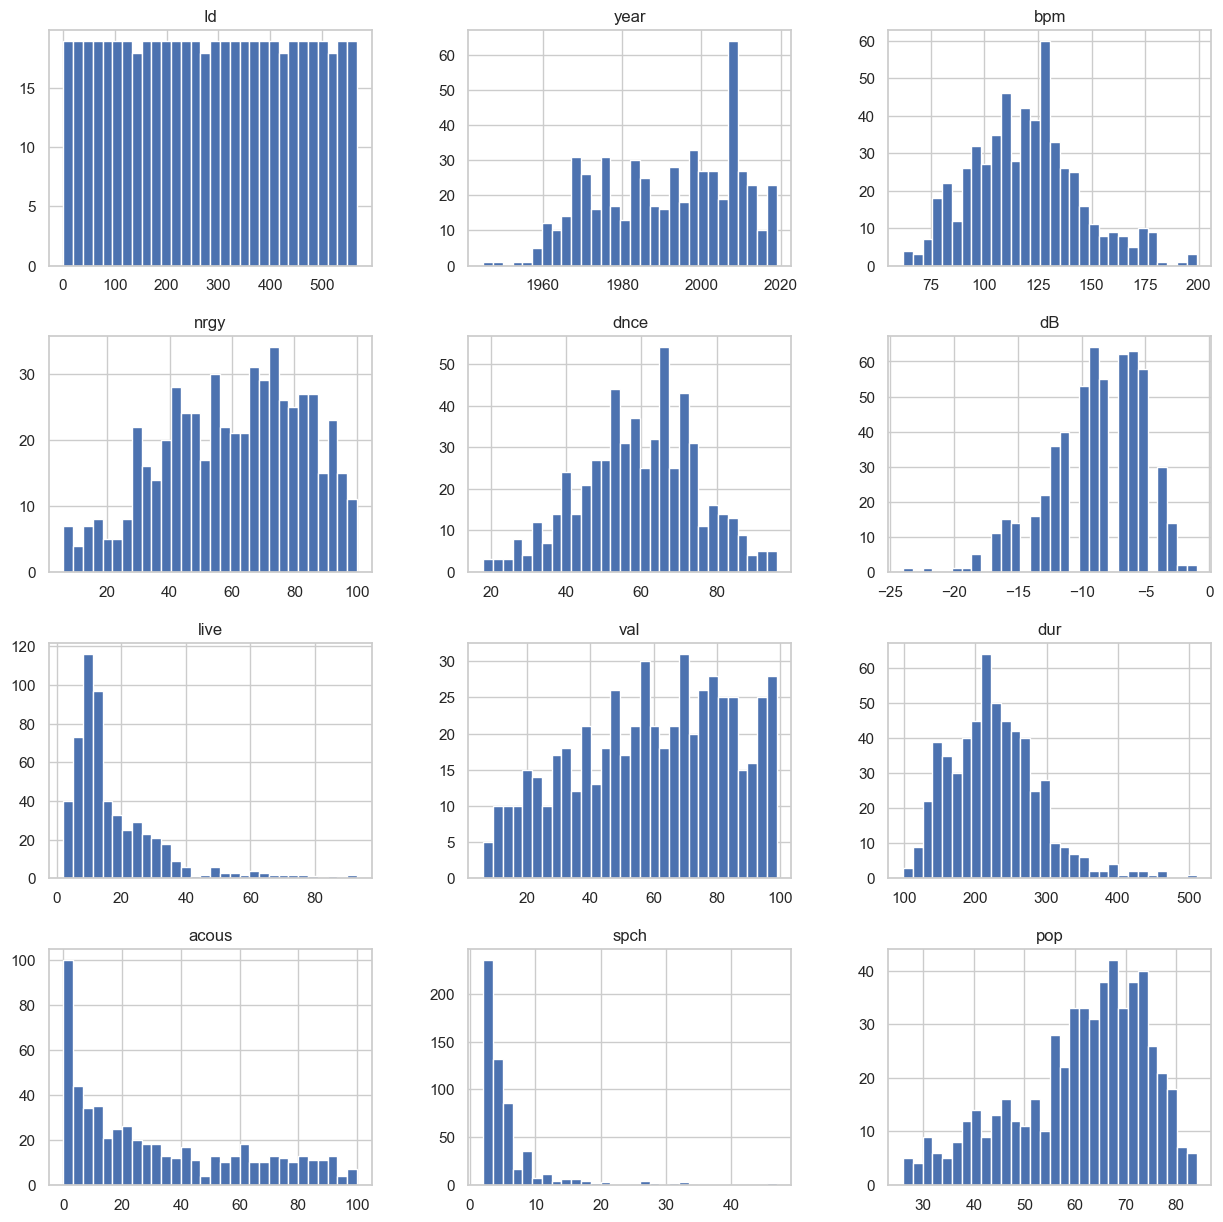

In [8]:
#Investigating skew of data
df.hist(bins=30, figsize=(15,15))
plt.show()

#right skewed for 'live' and 'acous' attributes
#symmetrical for 'dnce'